In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="n_jobs value 1 overridden to 1 by setting random_state.")
warnings.filterwarnings("ignore", message="MiniBatchKMeans is known to have a memory leak on Windows with MKL")

import time
import os
os.environ["OMP_NUM_THREADS"] = "2"

from scipy import stats
from scipy.stats import *
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

import umap


In [ ]:
combined_dataset_r = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\Dataset_407_pazienti_recidiva_dummy_best_1000.csv", index_col=0)


In [232]:
combined_dataset_r.to_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\Dataset_407_pazienti_recidiva_dummy.csv", index=True, header=True)


In [26]:
df_genomica_oc = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\all_ct_genomic_feat_puliti.xlsx", header=0)

In [9]:
df_genomica_hy = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\hy_genomics_feat.xlsx", header=0)

In [10]:
df_genomica_la = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\la_genomics_feat.xlsx", header=0)

In [12]:
df_genomica_op = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\op_genomics_feat.xlsx", header=0)

In [424]:
df_patient = pd.read_excel(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\Dataset_pazienti_con_recidiva.xlsx", header=0)

In [262]:
df_genomica_hy.index[1]

'Unnamed: 0'

In [27]:
df_genomica_oc

,SS_INT_0519,SS_INT_0035,SS_PR126,SS_305,SS_145,SS_PR131,SS_PR132,SS_PR133,SS_PR136,SS_PR139,...,SS_SBA_0092,SS_SBA_0093,SS_SBA_0002,SS_SBA0044,SS_SBA0045,SS_SBA_0058,SS_SBA_0061,SS_SBA_0067,SS_SBA0075,SS_SBA0078
0,4.51,5.25,4.61,5.13,4.88,4.83,4.94,5.29,4.95,4.60,...,5.57,6.09,6.49,6.49,5.85,6.64,5.78,6.04,7.08,6.75
1,3.28,4.20,3.88,4.61,4.51,3.74,3.71,3.18,3.87,4.44,...,4.01,6.95,3.46,3.92,4.19,4.47,4.32,3.64,3.96,4.05
2,2.95,2.96,4.05,3.72,3.89,3.97,3.81,3.57,3.59,3.64,...,3.70,3.85,3.39,3.31,3.27,3.25,3.26,3.21,3.28,3.39
3,3.50,3.67,4.41,4.06,4.28,3.48,4.12,3.46,4.79,3.88,...,4.98,4.56,3.50,3.70,3.55,4.15,4.18,3.36,3.51,2.94
4,4.51,3.86,5.16,5.05,5.55,5.10,5.26,4.35,4.52,5.02,...,4.53,6.32,5.43,4.42,4.85,3.65,4.77,4.68,4.54,5.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,3.66,3.73,3.42,3.20,3.43,3.27,4.86,3.52,3.36,3.49,...,3.45,3.02,3.47,3.54,3.37,3.61,3.53,3.32,3.97,3.01
26900,3.62,4.23,3.68,5.09,4.25,4.58,4.32,4.43,4.93,4.50,...,4.92,4.65,4.50,4.14,4.30,5.01,4.60,4.60,4.88,4.28
26901,4.41,4.34,3.98,4.23,4.08,4.62,4.23,4.46,4.60,4.48,...,5.06,5.52,3.94,4.99,4.32,4.45,4.57,4.76,4.94,4.44
26902,2.84,3.25,3.96,3.86,3.13,3.43,4.09,3.39,3.45,3.48,...,3.88,4.22,3.00,3.13,3.52,4.36,3.93,3.74,3.60,3.28


In [30]:
df_genomica_oc.T

,0,1,2,3,4,5,6,7,8,9,...,26894,26895,26896,26897,26898,26899,26900,26901,26902,26903
SS_INT_0519,4.51,3.28,2.95,3.50,4.51,4.60,3.19,3.94,8.33,4.55,...,5.21,4.33,3.62,3.65,3.60,3.66,3.62,4.41,2.84,3.54
SS_INT_0035,5.25,4.20,2.96,3.67,3.86,5.01,3.65,4.36,7.42,3.19,...,5.27,3.48,3.48,3.09,3.80,3.73,4.23,4.34,3.25,3.31
SS_PR126,4.61,3.88,4.05,4.41,5.16,3.79,3.21,4.49,5.83,3.81,...,4.15,3.56,4.25,4.23,4.81,3.42,3.68,3.98,3.96,3.48
SS_305,5.13,4.61,3.72,4.06,5.05,5.13,3.88,5.90,5.93,3.53,...,5.10,3.14,2.72,4.12,2.95,3.20,5.09,4.23,3.86,3.92
SS_145,4.88,4.51,3.89,4.28,5.55,4.82,3.67,4.22,6.56,4.20,...,4.84,3.04,3.86,3.96,4.47,3.43,4.25,4.08,3.13,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_SBA_0058,6.64,4.47,3.25,4.15,3.65,3.77,3.34,3.80,6.49,3.69,...,4.93,3.61,3.43,3.58,4.18,3.61,5.01,4.45,4.36,3.23
SS_SBA_0061,5.78,4.32,3.26,4.18,4.77,5.23,3.35,3.95,5.51,4.28,...,5.22,3.69,3.60,3.79,3.37,3.53,4.60,4.57,3.93,3.82
SS_SBA_0067,6.04,3.64,3.21,3.36,4.68,3.80,3.44,3.81,6.98,4.84,...,6.23,4.03,3.34,3.94,3.54,3.32,4.60,4.76,3.74,3.40
SS_SBA0075,7.08,3.96,3.28,3.51,4.54,3.64,3.31,3.83,8.15,4.66,...,5.55,3.73,3.18,3.86,3.99,3.97,4.88,4.94,3.60,3.25


In [32]:
std = StandardScaler()
l = std.fit_transform(df_genomica_oc.T)
l

array([[-1.09182315, -1.44645241, -1.63755708, ..., -0.1696931 ,
        -1.36037235,  0.40729236],
       [-0.27426093,  0.33996833, -1.6165361 , ..., -0.3843793 ,
        -0.56430142, -0.07074656],
       [-0.98134177, -0.28139541,  0.67475021, ..., -1.48847976,
         0.81426043,  0.28258655],
       ...,
       [ 0.59854199, -0.74741821, -1.09101172, ...,  0.90373791,
         0.38710042,  0.11631215],
       [ 1.74754837, -0.12605447, -0.94386489, ...,  1.45578815,
         0.11527133, -0.19545237],
       [ 1.38295981,  0.04870408, -0.71263416, ..., -0.07768472,
        -0.50605233, -0.61113838]])

In [40]:
l = pd.DataFrame(df_genomica_oc, columns=df_genomica_oc.columns)

In [42]:
l.describe()

,SS_INT_0519,SS_INT_0035,SS_PR126,SS_305,SS_145,SS_PR131,SS_PR132,SS_PR133,SS_PR136,SS_PR139,...,SS_SBA_0092,SS_SBA_0093,SS_SBA_0002,SS_SBA0044,SS_SBA0045,SS_SBA_0058,SS_SBA_0061,SS_SBA_0067,SS_SBA0075,SS_SBA0078
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,...,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,4.750235,4.664868,4.539986,4.641569,4.580197,4.631091,4.630944,4.595616,4.637640,4.540492,...,4.778373,4.738984,4.917975,4.787499,4.848185,4.613441,4.719241,4.770084,4.770660,4.831979
std,1.811491,1.655381,1.265626,1.304816,1.503998,1.327748,1.294537,1.535084,1.331635,1.335896,...,1.274825,1.168548,1.822978,1.660705,1.851937,1.257333,1.476310,1.658669,1.721822,1.859616
min,2.280000,2.300000,2.140000,2.240000,2.270000,2.280000,2.270000,2.360000,2.300000,2.240000,...,2.410000,2.420000,2.500000,2.500000,2.450000,2.470000,2.510000,2.490000,2.400000,2.470000
25%,3.540000,3.570000,3.650000,3.720000,3.590000,3.700000,3.720000,3.590000,3.700000,3.630000,...,3.880000,3.920000,3.720000,3.710000,3.640000,3.770000,3.760000,3.690000,3.650000,3.620000
50%,4.280000,4.270000,4.310000,4.400000,4.250000,4.370000,4.400000,4.250000,4.380000,4.280000,...,4.530000,4.550000,4.440000,4.360000,4.340000,4.370000,4.400000,4.360000,4.320000,4.320000
75%,5.400000,5.290000,5.150000,5.280000,5.180000,5.270000,5.260000,5.180000,5.290000,5.130000,...,5.390000,5.340000,5.550000,5.362500,5.460000,5.160000,5.280000,5.350000,5.352500,5.440000
max,19.790000,19.840000,19.440000,19.680000,19.810000,19.740000,19.820000,19.800000,19.450000,19.820000,...,19.320000,18.700000,19.930000,19.920000,19.930000,19.770000,19.910000,19.920000,19.920000,19.930000


In [13]:
df_genomica_hy = df_genomica_hy.drop(columns = 'Unnamed: 0.1')
df_genomica_op = df_genomica_op.drop(columns = 'Unnamed: 0.1')
df_genomica_la = df_genomica_la.drop(columns = 'Unnamed: 0.1')
df_genomica_hy = df_genomica_hy.drop(columns='Unnamed: 0')
df_genomica_la = df_genomica_la.drop(columns='Unnamed: 0')
df_genomica_op = df_genomica_op.drop(columns='Unnamed: 0')


In [14]:
df_genomica_hy = df_genomica_hy.T
df_genomica_hy_filtrato = df_genomica_hy.iloc[:, best_1000]

df_genomica_hy_filtrato

NameError: name 'best_1000' is not defined

In [ ]:
df_genomica_op = df_genomica_op.T
df_genomica_op_filtrato = df_genomica_op.iloc[:, best_1000]

df_genomica_op_filtrato

In [ ]:
df_genomica_la = df_genomica_la.T
df_genomica_la_filtrato = df_genomica_la.iloc[:, best_1000]

df_genomica_la_filtrato

In [ ]:
df_genomica_oc = df_genomica_oc.T
df_genomica_oc_filtrato = df_genomica_oc.iloc[:, best_1000]

df_genomica_oc_filtrato

In [ ]:
best_1000 = [22430, 23523, 11714, 7959, 15806, 9713, 15854, 3861, 14674, 26070, 26751, 7209, 4016, 10648, 11525, 13224, 15281, 9211, 26725, 8261, 12163, 8876, 21957, 14761, 9446, 10733, 8811, 12493, 19012, 9466, 19182, 20141, 10706, 13751, 5631, 979, 8038, 22594, 20490, 5070, 20828, 12159, 7276, 25924, 23205, 25197, 20812, 26760, 17885, 10032, 20862, 2371, 23974, 6272, 12735, 6255, 12820, 16805, 9973, 19289, 19783, 1924, 25703, 15679, 12413, 23166, 9841, 4992, 8954, 3665, 19735, 819, 8625, 6967, 14984, 10016, 26846, 24506, 11120, 10722, 18736, 10212, 3276, 6790, 1102, 15805, 14749, 7331, 18228, 1769, 12786, 933, 2784, 2880, 9928, 21474, 24258, 26020, 15902, 25532, 9359, 20683, 16704, 12241, 21781, 15564, 16904, 19066, 4275, 24214, 11415, 5265, 11816, 4581, 11555, 8420, 17038, 14890, 4341, 9848, 18151, 5764, 21005, 21319, 11604, 6944, 24351, 12825, 16572, 17143, 25636, 11253, 17051, 13018, 1167, 11509, 19809, 20921, 978, 22828, 6315, 4474, 22801, 16296, 17819, 20486, 20001, 4118, 7360, 6109, 12459, 18009, 14219, 1789, 9802, 18993, 2220, 23917, 20163, 22903, 17413, 21696, 2665, 9847, 128, 18026, 8331, 4916, 16629, 13437, 23649, 23634, 17381, 18353, 3922, 13904, 15156, 10057, 1013, 10096, 13053, 1910, 6988, 4570, 22403, 17316, 6276, 16147, 25932, 10432, 23821, 10222, 44, 15790, 2301, 9279, 14968, 13194, 16249, 7109, 3900, 15192, 25169, 6478, 19088, 20780, 8624, 3855, 10204, 21677, 25788, 1457, 16502, 8693, 24637, 13498, 15977, 23977, 15177, 11564, 2585, 6524, 11466, 9431, 4114, 16971, 9310, 21015, 5724, 4049, 8979, 15338, 1455, 18172, 7648, 10442, 5111, 18213, 16857, 4365, 23734, 23264, 2868, 14409, 21770, 26559, 13452, 26792, 4668, 25573, 580, 13523, 14247, 14073, 5830, 22698, 3033, 7200, 9423, 3675, 16756, 23482, 1489, 17980, 8549, 11918, 9694, 26560, 16707, 11449, 1937, 5710, 24437, 18590, 10279, 12024, 12055, 14077, 20050, 20590, 15958, 16702, 17463, 4463, 804, 12734, 25257, 5783, 25992, 20269, 9769, 4085, 6089, 4139, 9226, 5744, 9256, 318, 20116, 24218, 23704, 2076, 334, 9509, 20458, 1542, 25096, 21812, 17820, 14919, 14258, 2484, 12682, 19198, 4435, 10234, 10221, 9775, 19811, 10437, 3686, 304, 2120, 5338, 5461, 15568, 3101, 15409, 17705, 16779, 25930, 11279, 1478, 12284, 7152, 2314, 12653, 24841, 16714, 23049, 5923, 1571, 20194, 8788, 25520, 11426, 14008, 18573, 6518, 2829, 16788, 7430, 17473, 20513, 5838, 3372, 14120, 21492, 2099, 4730, 6483, 21495, 12188, 25887, 23363, 25657, 26220, 9610, 12976, 4606, 10456, 13339, 1432, 19855, 17729, 25308, 3968, 20430, 15348, 26879, 9070, 11860, 25952, 15437, 12371, 2480, 22317, 18189, 24004, 13590, 671, 24126, 9808, 14666, 21782, 18852, 15452, 9113, 11478, 1871, 197, 15054, 13054, 15623, 24784, 4847, 19918, 1227, 15181, 10232, 4140, 14706, 7303, 16760, 14898, 20799, 14896, 12698, 20255, 14779, 382, 26859, 256, 25842, 23168, 3943, 12548, 11856, 8522, 19288, 691, 8662, 19701, 5127, 8068, 23313, 1692, 17595, 11834, 26041, 12424, 19436, 15602, 10736, 25964, 8869, 8500, 4122, 10353, 23617, 23383, 12766, 5037, 24024, 20890, 21483, 24014, 22171, 3044, 17938, 2395, 4695, 26387, 24333, 18363, 26578, 3567, 7241, 6822, 26287, 9750, 21487, 8735, 19848, 19165, 10621, 1204, 10629, 728, 12517, 11532, 18617, 587, 15478, 13118, 9826, 16659, 21525, 26461, 6903, 9892, 23765, 959, 8950, 24639, 25487, 20653, 287, 24667, 7996, 16827, 3755, 4785, 1765, 24979, 15039, 22326, 14036, 13823, 19223, 621, 26148, 58, 12352, 3270, 7647, 21168, 2592, 19004, 10828, 23752, 23562, 963, 21324, 22086, 3948, 8227, 6257, 2698, 10744, 21442, 24812, 2571, 7164, 7883, 9452, 2345, 5699, 21197, 22334, 12904, 13102, 19275, 887, 24293, 1767, 5315, 6246, 6848, 21544, 23463, 745, 3594, 18713, 20108, 2774, 17548, 16487, 4635, 4146, 10168, 9355, 12025, 17900, 19669, 8773, 1316, 913, 16451, 6268, 14520, 8914, 7119, 7673, 19400, 16490, 23023, 3283, 5018, 2479, 12195, 21820, 5639, 25290, 14002, 15278, 16950, 487, 26221, 15514, 3817, 1034, 13150, 2195, 11266, 6536, 26880, 8021, 4693, 1701, 22425, 12285, 4354, 25717, 15333, 4514, 25398, 13147, 15028, 15489, 10856, 2009, 2221, 8378, 26076, 8828, 9597, 19826, 25468, 26497, 25823, 7608, 9849, 8496, 7906, 21775, 8820, 124, 3836, 22753, 11575, 6968, 20965, 3670, 2569, 7593, 18338, 15745, 9508, 17812, 3668, 4640, 22219, 18923, 22542, 13117, 24629, 13907, 21241, 14510, 8747, 15279, 19001, 5237, 3723, 5266, 7592, 4500, 19105, 11586, 18293, 2795, 13713, 6308, 14921, 9177, 16303, 5939, 11347, 16352, 3970, 15371, 19387, 17942, 15674, 21457, 18327, 13403, 12406, 18265, 26571, 15205, 11910, 22565, 19734, 11319, 26036, 2647, 5687, 22183, 15993, 22635, 4232, 1035, 3603, 468, 9666, 10330, 7554, 1311, 3405, 7835, 20469, 26536, 24905, 15450, 6053, 3384, 392, 3751, 25300, 23418, 10976, 8753, 4923, 17246, 1080, 16726, 23632, 7315, 15117, 23376, 20292, 12422, 9282, 9927, 10056, 10207, 2639, 12278, 23246, 10780, 5071, 18625, 7633, 23575, 7034, 20322, 11607, 6016, 15780, 9966, 17690, 22053, 1354, 4931, 19028, 18781, 21553, 19743, 11180, 19965, 25549, 2973, 15043, 3984, 24996, 6342, 3085, 11191, 19126, 1713, 23831, 2091, 7781, 24662, 20879, 2559, 4294, 11879, 8831, 5626, 4284, 26282, 20797, 9512, 598, 9988, 20608, 13500, 337, 4274, 4528, 23986, 23332, 2500, 4772, 25585, 20374, 17353, 10241, 15397, 26753, 4551, 26380, 6999, 13960, 19929, 20335, 19298, 22122, 11272, 3409, 2307, 8676, 7773, 14191, 19484, 7321, 17897, 7711, 5062, 17600, 21036, 462, 6761, 6282, 11537, 8908, 17539, 2324, 2265, 9149, 18230, 11473, 2323, 10880, 8705, 12664, 1837, 11111, 23583, 12683, 7961, 12629, 9672, 719, 14679, 7403, 22862, 12456, 1519, 16759, 13963, 20104, 3109, 6420, 21796, 6364, 8780, 16496, 4790, 17006, 16128, 21789, 11450, 9272, 24219, 16545, 19879, 25361, 22345, 12873, 17291, 4959, 14747, 10464, 13699, 8873, 21195, 3885, 25870, 5767, 8480, 17683, 2114, 19967, 23378, 8272, 7933, 4678, 17440, 23856, 21801, 15347, 3202, 17726, 15998, 7240, 2319, 5789, 6407, 6128, 63, 13940, 23940, 5080, 13884, 22724, 17931, 9137, 10917, 9013, 17431, 3349, 3634, 9623, 24262, 17918, 2151, 2962, 11672, 23844, 6138, 21460, 1106, 1020, 14279, 15080, 7488, 13804, 12688, 9458, 13214, 10414, 17437, 25931, 2672, 26355, 8189, 26048, 6682, 5374, 8860, 22871, 7821, 22818, 7588, 11413, 5475, 19764, 1211, 5709, 3687, 862, 5045, 12042, 9637, 7334, 20537, 4971, 17339, 2912, 3195, 6943, 4415, 19247, 4301, 3678, 15658, 26258, 2459, 10734, 5030, 20060, 24712, 17344, 4804, 10863, 17235, 15849, 24929, 9362, 17860, 6044, 14822, 2193, 8379, 25881, 8644, 18814, 8559, 14916, 24267, 19249, 3277, 16886, 11791, 10993, 17850, 25024, 18038, 15652, 19540, 23153, 3328, 13505, 24696, 605, 15480]

In [286]:
scaler = StandardScaler()
# APPLICO LA STANDARDIZATION Z-SCORE
df_oc = scaler.fit_transform(df_genomica_oc_filtrato.T)
df_op = scaler.fit_transform(df_genomica_op_filtrato.T)
df_la = scaler.fit_transform(df_genomica_la_filtrato.T)
df_hy = scaler.fit_transform(df_genomica_hy_filtrato.T)

df_oc = pd.DataFrame(df_oc, columns=df_genomica_oc_filtrato.T.columns)
df_op = pd.DataFrame(df_op, columns=df_genomica_op_filtrato.T.columns)
df_la = pd.DataFrame(df_la, columns=df_genomica_la_filtrato.T.columns)
df_hy = pd.DataFrame(df_hy, columns=df_genomica_hy_filtrato.T.columns)



In [22]:
df_oc

NameError: name 'df_oc' is not defined

In [333]:
#FACCIO IL DATASET UNITO

doc = df_genomica_oc_filtrato
dla = df_genomica_la_filtrato
dhy = df_genomica_hy_filtrato
dop = df_genomica_op_filtrato

# dla['Type'] = 'la'
# dhy['Type'] = 'hy'
# dop['Type'] = 'op'
# doc['Type'] = 'oc'

combined_dataset = pd.concat([df_genomica_oc_filtrato, df_genomica_op_filtrato, df_genomica_hy_filtrato, df_genomica_la_filtrato], ignore_index=False)

In [317]:
dop

0

In [335]:
combined_dataset

,22430,23523,11714,7959,15806,9713,15854,3861,14674,26070,...,18038,15652,19540,23153,3328,13505,24696,605,15480,Type
SS_INT_0519,4.66,7.86,4.52,7.34,5.47,6.65,4.7,7.66,3.49,12.92,...,7.35,4.31,4.73,4.41,2.77,3.11,3.74,5.8,5.88,oc
SS_INT_0035,4.36,7.72,4.7,5.27,4.32,6.39,4.25,7.54,4.21,12.73,...,6.68,3.92,3.65,5.14,3.22,2.96,3.31,6.73,4.33,oc
SS_PR126,4.39,5.95,5.22,5.2,4.32,6.93,4.21,5.91,4.07,7.34,...,4.14,5.26,3.36,4.7,4.17,3.89,4.0,3.65,4.02,oc
SS_305,4.47,5.48,6.09,4.98,4.77,6.16,5.31,4.44,4.24,7.19,...,2.81,5.24,3.04,4.18,4.53,4.04,4.35,3.78,4.21,oc
SS_145,5.08,6.48,4.96,4.87,4.81,5.8,4.51,6.23,3.73,10.13,...,4.69,4.67,2.77,4.05,3.94,2.99,4.26,5.13,5.26,oc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_SBA_0004,6.78,5.87,5.35,5.61,5.3,7.18,4.66,6.55,4.15,7.31,...,3.4,4.24,4.48,6.56,3.5,3.51,4.59,3.58,3.98,la
SS_SBA_0012,7.45,8.59,4.47,7.16,6.02,7.37,4.72,8.86,4.17,11.55,...,5.88,5.04,4.41,5.48,3.74,3.09,3.91,5.5,4.5,la
SS_SBA_0016,6.63,5.69,5.57,4.74,5.55,7.02,5.17,7.47,3.71,8.89,...,4.28,5.32,3.86,5.01,3.31,3.43,5.29,3.39,4.87,la
SS_SBA_0018,7.12,7.31,4.91,4.75,5.39,7.86,5.15,7.13,3.93,10.38,...,3.69,4.78,4.82,5.42,3.73,3.57,4.13,6.5,4.56,la


In [339]:
# DF STANDARDIZZATO Z SCORE
import numpy as np
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Inizializzazione
max_ari = -1
best_n_neighbors = None
neighbours = np.linspace(5, 150, 5, dtype=int)  # n_neighbors deve essere intero

for n in neighbours:
    print(f"\nEsecuzione con n_neighbors={n}...")
    
    # Creazione dell'oggetto UMAP
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Clustering con KMeans
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(combined_embedding)
    
    # Calcolo del Silhouette Score (se ci sono più cluster)
    if len(set(labels)) > 1:
        score = silhouette_score(combined_embedding, labels)
    else:
        score = None
    
    # Calcolo dell'Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(combined_dataset['Type'], labels)
    
    # Aggiornamento del miglior ARI
    if ari > max_ari:
        max_ari = ari
        best_n_neighbors = n
        print(f"Nuovo miglior ARI: {ari:.2f}")
        print(f"Silhouette Score: {score:.2f}" if score is not None else "Silhouette Score non calcolabile.")
        print(f"Neighbours = {n}")
    
    # Visualizzazione dei cluster (opzionale)
    # plt.figure(figsize=(10, 8))
    # unique_labels = set(labels)
    # for label in unique_labels:
    #     mask = labels == label
    #     plt.scatter(
    #         combined_embedding[mask, 0],
    #         combined_embedding[mask, 1],
    #         label=f"Cluster {label}",
    #         alpha=0.6
    #     )
    # plt.title(f"Clustering con KMeans (n_neighbors={n})")
    # plt.xlabel("UMAP Dimension 1")
    # plt.ylabel("UMAP Dimension 2")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

print(f"\nMiglior ARI: {max_ari:.2f} con n_neighbors={best_n_neighbors}")




Esecuzione con n_neighbors=5...
Nuovo miglior ARI: 0.26
Silhouette Score: 0.47
Neighbours = 5

Esecuzione con n_neighbors=41...
Nuovo miglior ARI: 0.68
Silhouette Score: 0.53
Neighbours = 41

Esecuzione con n_neighbors=77...
Nuovo miglior ARI: 1.00
Silhouette Score: 0.66
Neighbours = 77

Esecuzione con n_neighbors=113...

Esecuzione con n_neighbors=150...


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(



Miglior ARI: 1.00 con n_neighbors=77


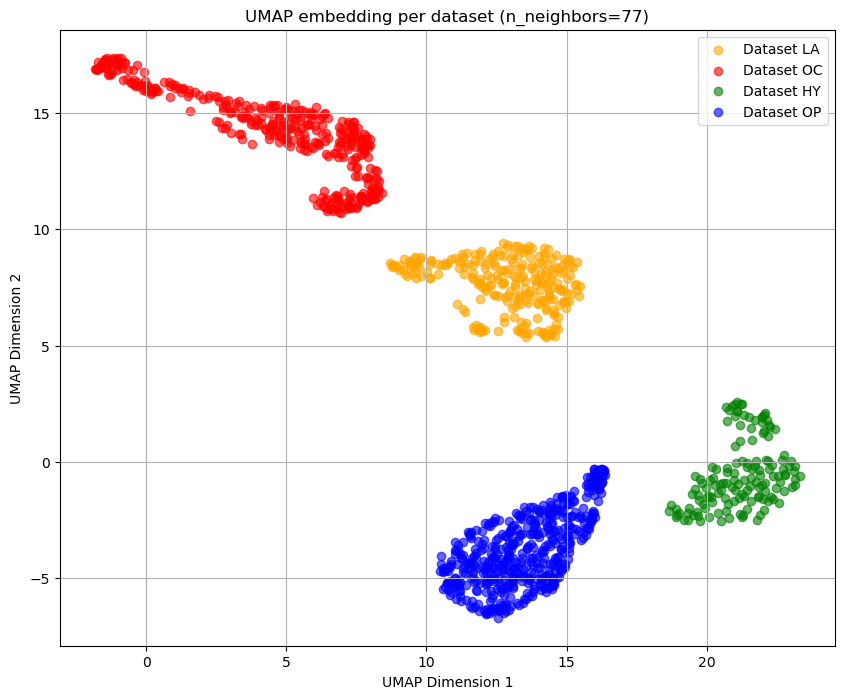


Miglior ARI: -1.00


In [343]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import umap

# Inizializzazione
max_ari = -1
neighbours = [77]

# Array di etichette per identificare il dataset di origine
dataset_labels = (
    ["OC"] * df_oc.shape[1] +  # Assegna "OC" per ogni colonna di df_oc
    ["OP"] * df_op.shape[1] +  # Assegna "OP" per ogni colonna di df_op
    ["HY"] * df_hy.shape[1] +  # Assegna "HY" per ogni colonna di df_hy
    ["LA"] * df_la.shape[1]    # Assegna "LA" per ogni colonna di df_la
)

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc = reducer.fit_transform(df_oc.T)
    op = reducer.fit_transform(df_op.T)
    hy = reducer.fit_transform(df_hy.T)
    la = reducer.fit_transform(df_la.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding = np.vstack([oc, op, hy, la])
    
    # Assegna un colore per ogni dataset
    color_map = {"OC": "red", "OP": "blue", "HY": "green", "LA": "orange"}
    
    # Visualizzazione dei punti con colori distinti per dataset
    plt.figure(figsize=(10, 8))
    for label in set(dataset_labels):
        mask = np.array(dataset_labels) == label
        plt.scatter(
            combined_embedding[mask, 0],
            combined_embedding[mask, 1],
            c=color_map[label],
            label=f"Dataset {label}",
            alpha=0.6
        )
    
    plt.title(f"UMAP embedding per dataset (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari:.2f}")


FIN QUI HO CALCOLATO SOLO ARI CON 'TYPE' E TUTTE LE COLONNE SENZA FILTRARE SOLO PER I RECIDIVI ETC.
_________________________________________________________________________________

____________________________________
PAZIENTI CON RECIDIVA

In [350]:
#LISTA DI PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE
pazienti_con_ricorrenza = ['SS_UL0006', 'SS_UL0009', 'SS_UL0015', 'SS_UDUS115', 'SS_UDUS116','SS_UDUS125', 'SS_UDUS126', 'SS_UDUS129', 'SS_UDUS133','SS_UDUS148', 'SS_UDUS163', 'SS_UDUS140', 'SS_MAASTRO_5588','SS_MAASTRO_215', 'SS_MAASTRO_416', 'SS_MAASTRO_588','SS_MAASTRO_4746', 'SS_MAASTRO_2867', 'SS_MAASTRO_7077','SS_MAASTRO_177', 'SS_MAASTRO_7265', 'SS_MAASTRO_5082','SS_MAASTRO_8441', 'SS_MAASTRO_8118', 'SS_MAASTRO_8386','SS_MAASTRO_6905', 'SS_INT_MI_0045', 'SS_INT_MI_0146','SS_INT_MI_0103', 'SS_INT_MI_0055', 'SS_INT_MI_0034',
       'SS_INT_0266', 'SS_INT_0056', 'SS_INT_0064', 'SS_INT_0105','SS_INT_0148', 'SS_INT_0157', 'SS_INT_0016', 'SS_INT_0017','SS_INT_0020', 'SS_INT_0069', 'SS_INT_0267', 'SS_INT_0138','SS_INT_0197', 'SS_INT_0272', 'SS_INT_0220', 'SS_INT_0236','SS_INT_0247', 'SS_INT_0144', 'SS_INT_0182', 'SS_INT_0024','SS_INT_0249', 'SS_INT_0003', 'SS_INT_0313', 'SS_INT_0012',
       'SS_INT_0303', 'SS_INT_0310', 'SS_INT_0280', 'SS_INT_0353',
       'SS_INT_0354', 'SS_INT_0356', 'SS_INT_0357', 'SS_INT_0361',
       'SS_INT_0104', 'SS_INT_0515', 'SS_INT_0390', 'SS_INT_0269',
       'SS_INT_0398', 'SS_INT_0402', 'SS_INT_0503', 'SS_INT_0420',
       'SS_INT_0264', 'SS_INT_0244', 'SS_INT_0347', 'SS_INT_0296',
       'SS_INT_0297', 'SS_INT_0308', 'SS_INT_0309', 'SS_INT_0124',
       'SS_INT_0318', 'SS_INT_0324', 'SS_INT_0327', 'SS_INT_0392',
       'SS_INT_0423', 'SS_INT_0406', 'SS_INT_0436', 'SS_INT_0413',
       'SS_INT_0528', 'SS_INT_0002', 'SS_INT_0485', 'SS_INT_0464',
       'SS_INT_0516', 'SS_INT_0255', 'SS_INT_0273', 'SS_INT_0158',
       'SS_INT_0328', 'SS_INT_0042', 'SS_INT_0518', 'SS_INT_0517',
       'SS_INT_0305', 'SS_INT_0531', 'SS_INT_0530', 'SS_INT_0532',
       'SS_INT_0323', 'SS_INT_0165', 'SS_AOP_PR16', 'SS_AOP_PR16_9745',
       'SS_AOP_PR17', 'SS_AOP_PRX7', 'SS_AOP_PRX8', 'SS_AOP_PR20_9224',
       'SS_AOP_PR21', 'SS_AOP_PR21_9812', 'SS_AOP_PR_A',
       'SS_AOP_PR21_122', 'SS_AOP_PR21_5437', 'SS_AOP_PR22',
       'SS_AOP_PR17_3965', 'SS_AOP_PR18_5300', 'SS_AOP_PR19_2030',
       'SS_AOP_PR_A_1043', 'SS_AOP_PR19_3106', 'SS_SBA_0008',
       'SS_SBA_0014', 'SS_SBA0075', 'SS_SBA_0058', 'SS_SBA_0050',
       'SS_SBA_0088', 'SS_SBA0082', 'SS_SBA0080', 'SS_SBA_0048', 'SS_91',
       'SS_93_9405', 'SS_146', 'SS_158', 'SS_163', 'SS_169', 'SS_173',
       'SS_174', 'SS_176', 'SS_226', 'SS_231', 'SS_232', 'SS_251',
       'SS_257', 'SS_258', 'SS_276', 'SS_287', 'SS_297', 'SS_298',
       'SS_302', 'SS_305', 'SS_307', 'SS_308', 'SS_309', 'SS_327',
       'SS_NPR125', 'SS_PR126', 'SS_PR131', 'SS_PR132', 'SS_PR135',
       'SS_PR136', 'SS_PR142', 'SS_PR148', 'SS_PR149', 'SS_PR150',
       'SS_PR163', 'SS_INT_MI_0118', 'SS_INT_MI_0108', 'SS_INT_MI_0153',
       'SS_INT_MI_0092', 'SS_INT_MI_0100', 'SS_INT_MI_0070',
       'SS_INT_MI_0243', 'SS_INT_MI_0140', 'SS_INT_MI_0122',
       'SS_INT_MI_0041', 'SS_INT_MI_0001', 'SS_INT_MI_0087',
       'SS_INT_MI_0097', 'SS_INT_MI_0151', 'SS_INT_MI_0088',
       'SS_INT_MI_0076', 'SS_INT_MI_0159', 'SS_INT_MI_0059',
       'SS_INT_MI_0018', 'SS_INT_MI_0062', 'SS_INT_0075',
       'SS_INT_MI_0235', 'SS_INT_MI_0009', 'SS_INT_MI_0127',
       'SS_INT_MI_0090', 'SS_INT_MI_0130', 'SS_INT_MI_0225',
       'SS_INT_MI_0128', 'SS_INT_MI_0185', 'SS_INT_MI_0107',
       'SS_INT_MI_0224', 'SS_INT_MI_0007', 'SS_INT_MI_0223',
       'SS_INT_MI_0093', 'SS_INT_MI_0049', 'SS_INT_MI_0051',
       'SS_INT_0065', 'SS_INT_0079', 'SS_INT_0265', 'SS_INT_0259',
       'SS_INT_0270', 'SS_INT_0180', 'SS_INT_0186', 'SS_INT_0190',
       'SS_INT_0216', 'SS_INT_0014', 'SS_INT_0035', 'SS_INT_0084',
       'SS_INT_0123', 'SS_INT_0126', 'SS_INT_0155', 'SS_INT_0139',
       'SS_INT_0202', 'SS_INT_0250', 'SS_INT_0172', 'SS_INT_0181',
       'SS_INT_0143', 'SS_INT_0271', 'SS_INT_0282', 'SS_INT_0044',
       'SS_INT_0277', 'SS_INT_0256', 'SS_INT_0261', 'SS_INT_0052',
       'SS_INT_0040', 'SS_INT_0312', 'SS_INT_0330', 'SS_INT_0333',
       'SS_INT_0342', 'SS_INT_0071', 'SS_INT_0350', 'SS_INT_0351',
       'SS_INT_0077', 'SS_INT_0359', 'SS_INT_0099', 'SS_INT_0363',
       'SS_INT_0367', 'SS_INT_0374', 'SS_INT_0382', 'SS_INT_0409',
       'SS_INT_0179', 'SS_INT_0412', 'SS_INT_0437', 'SS_INT_0444',
       'SS_INT_0446', 'SS_INT_0447', 'SS_INT_0453', 'SS_INT_0454',
       'SS_INT_0476', 'SS_INT_0294', 'SS_INT_0438', 'SS_INT_0430',
       'SS_INT_0508', 'SS_INT_0506', 'SS_INT_0217', 'SS_INT_0419',
       'SS_INT_0415', 'SS_INT_0194', 'SS_INT_0410', 'SS_INT_0400',
       'SS_INT_0497', 'SS_INT_0494', 'SS_INT_0470', 'SS_INT_0095',
       'SS_INT_0355', 'SS_INT_0491', 'SS_INT_0490', 'SS_INT_0489',
       'SS_INT_0293', 'SS_INT_0487', 'SS_INT_0348', 'SS_INT_0486',
       'SS_INT_0344', 'SS_INT_0341', 'SS_INT_0335', 'SS_INT_0482',
       'SS_INT_0365', 'SS_INT_0383', 'SS_INT_0387', 'SS_INT_0408',
       'SS_INT_0421', 'SS_INT_0384', 'SS_INT_0519', 'SS_INT_0427',
       'SS_INT_0288', 'SS_INT_0471', 'SS_INT_0385', 'SS_INT_0417',
       'SS_INT_0329', 'SS_INT_0037', 'SS_INT_0343', 'SS_INT_0373',
       'SS_INT_0380', 'SS_INT_0391', 'SS_INT_0424', 'SS_INT_0535',
       'SS_INT_0340', 'SS_INT_0411', 'SS_INT_0168', 'SS_UDUS7',
       'SS_UDUS9', 'SS_UDUS22', 'SS_UDUS34', 'SS_UDUS40', 'SS_UDUS51',
       'SS_UDUS58', 'SS_UDUS61', 'SS_UDUS4', 'SS_UDUS30', 'SS_UDUS78',
       'SS_UDUS81', 'SS_UDUS94', 'SS_UDUS64', 'SS_UDUS62', 'SS_UDUS67',
       'SS_MAASTRO_3946', 'SS_MAASTRO_609', 'SS_MAASTRO_2835',
       'SS_MAASTRO_9495', 'SS_MAASTRO_7879', 'SS_MAASTRO_8534',
       'SS_MAASTRO_6983', 'SS_MAASTRO_8033', 'SS_MAASTRO_6417',
       'SS_MAASTRO_9474', 'SS_MAASTRO_3328', 'SS_MAASTRO_7347',
       'SS_MAASTRO_2517', 'SS_MAASTRO_5111', 'SS_MAASTRO_9983',
       'SS_MAASTRO_6790', 'SS_MAASTRO_5979', 'SS_MAASTRO_7504',
       'SS_MAASTRO_4661', 'SS_MAASTRO_3880', 'SS_MAASTRO_6175',
       'SS_MAASTRO_6917', 'SS_MAASTRO_7303', 'SS_MAASTRO_3732',
       'SS_MAASTRO_7906', 'SS_MAASTRO_1257', 'SS_MAASTRO_272',
       'SS_MAASTRO_7006', 'SS_MAASTRO_6474', 'SS_MAASTRO_7773',
       'SS_MAASTRO_8623', 'SS_MAASTRO_8354', 'SS_MAASTRO_5470',
       'SS_MAASTRO_3180', 'SS_MAASTRO_7048', 'SS_MAASTRO_2500',
       'SS_MAASTRO_4462', 'SS_MAASTRO_576', 'SS_MAASTRO_1283',
       'SS_MAASTRO_7151', 'SS_MAASTRO_6972', 'SS_MAASTRO_7711',
       'SS_MAASTRO_9583', 'SS_MAASTRO_4393', 'SS_MAASTRO_6489',
       'SS_MAASTRO_1706', 'SS_MAASTRO_6168', 'SS_MAASTRO_5370',
       'SS_MAASTRO_5546', 'SS_MAASTRO_9255', 'SS_MAASTRO_3897',
       'SS_MAASTRO_9886', 'SS_MAASTRO_1291', 'SS_MAASTRO_4801',
       'SS_MAASTRO_1836', 'SS_MAASTRO_7147', 'SS_MAASTRO_5281',
       'SS_MAASTRO_969', 'SS_MAASTRO_238', 'SS_MAASTRO_53813',
       'SS_VUMC_011', 'SS_VUMC_020', 'SS_VUMC_021', 'SS_VUMC_040',
       'SS_VUMC_064', 'SS_VUMC_066', 'SS_VUMC_068', 'SS_VUMC_077',
       'SS_VUMC_088', 'SS_VUMC_107', 'SS_VUMC_116', 'SS_VUMC_119',
       'SS_VUMC051', 'SS_VUMC_138', 'SS_VUMC_147', 'SS_VUMC_186',
       'SS_VUMC_196', 'SS_VUMC_OC_4275', 'SS_VUMC_OC_1860',
       'SS_VUMC_OC_3383', 'SS_VUMC_OC_3744', 'SS_VUMC_OC_6758',
       'SS_VUMC_OC_2676', 'SS_VUMC_OC_4196', 'SS_VUMC_OC_8636',
       'SS_VUMC_OC_6494', 'SS_VUMC_OC_8600', 'SS_VUMC_OC_8033',
       'SS_VUMC_OC_2801', 'SS_VUMC_OC_7559', 'SS_VUMC_OC_5735',
       'SS_VUMC_OC_6666', 'SS_VUMC_218', 'SS_VUMC_096', 'SS_VUMC_110',
       'SS_VUMC_166', 'SS_VUMC_175', 'SS_VUMC_202', 'SS_VUMC_205',
       'SS_VUMC_OP_1439', 'SS_VUMC_OP_639', 'SS_VUMC_OP_2071',
       'SS_VUMC_OP_5132', 'SS_VUMC_OP_4053', 'SS_VUMC_OP_8929',
       'SS_VUMC_OP_2375', 'SS_VUMC_OP_9850', 'SS_VUMC_OP_7374',
       'SS_VUMC_OP_2220', 'SS_VUMC_OP_7702', 'SS_VUMC_OP_6371',
       'SS_VUMC_OP_7942', 'SS_VUMC_OP_6471', 'SS_VUMC_OP_604',
       'SS_VUMC_OP_6545', 'SS_VUMC_HPL_3735', 'SS_VUMC_HPL_8582',
       'SS_VUMC_HPL_167', 'SS_VUMC_HPL_596', 'SS_VUMC_HPL_8569',
       'SS_VUMC_HPL_7423', 'SS_VUMC_HPL_259', 'SS_VUMC_HPL_8154',
       'SS_VUMC_HPL_7415', 'SS_VUMC_HPL_2485', 'SS_VUMC_HPL_5499',
       'SS_VUMC_HPL_2946', 'SS_VUMC_HPL_1753', 'SS_VUMC_HPL_6747',
       'SS_VUMC_HPL_1354', 'SS_VUMC_HPL_1509', 'SS_VUMC_HPL_6555',
       'SS_VUMC_HPL_4078', 'SS_VUMC_HPL_4620', 'SS_VUMC_HPL_8908',
       'SS_VUMC_HPL_9443', 'SS_VUMC_HPL_9990', 'SS_VUMC_HPL_641',
       'SS_VUMC_HPL_6441', 'SS_VUMC_HPL_4004', 'SS_VUMC_HPL_9271',
       'SS_VUMC_OP_983', 'SS_VUMC_OP_1135', 'SS_VUMC_OP_8135',
       'SS_VUMC_OP_3673', 'SS_VUMC_OP_2899', 'SS_VUMC_OP_1079',
       'SS_VUMC_OP_5152', 'SS_VUMC_OP_7387', 'SS_VUMC_OP_6646',
       'SS_VUMC_OP_5667', 'SS_VUMC_OP_2710', 'SS_VUMC_OP_5431',
       'SS_VUMC_OP_3483', 'SS_VUMC_OP_4170', 'SS_VUMC_OP_8325',
       'SS_VUMC_OP_7536', 'SS_VUMC_OP_6402', 'SS_VUMC_OP_9515',
       'SS_VUMC_OP_5747', 'SS_VUMC_OP_4667', 'SS_VUMC_OP_540',
       'SS_VUMC_OP_9673', 'SS_VUMC_OP_5362', 'SS_VUMC_OP_7452',
       'SS_VUMC_OP_62', 'SS_VUMC_OP_7574', 'SS_VUMC_HPL_677',
       'SS_VUMC_HPL_7065', 'SS_VUMC_HPL_5057', 'SS_VUMC_HPL_7569',
       'SS_VUMC_HPL_3990', 'SS_VUMC_HPL_3294', 'SS_VUMC_HPL_1422',
       'SS_VUMC_HPL_8699', 'SS_VUMC_HPL_1601', 'SS_VUMC_HPL_6151',
       'SS_VUMC_HPL_2682', 'SS_VUMC_HPL_1315', 'SS_VUMC_HPL_3593',
       'SS_VUMC_HPL_7464', 'SS_VUMC_HPL_2988', 'SS_VUMC_HPL_4427',
       'SS_VUMC_HPL_3711', 'SS_VUMC_HPL_7244', 'SS_VUMC_HPL_8612',
       'SS_VUMC_HPL_1859', 'SS_VUMC_HPL_4174', 'SS_VUMC_HPL_5181']


In [402]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (ORAL CAVITY) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_oc.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_oc_vivi_con_ricorrenza = df_oc[columns_to_keep]


In [406]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (ORAL CAVITY) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_op.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_op_vivi_con_ricorrenza = df_op[columns_to_keep]


In [408]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (ORAL CAVITY) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_la.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_la_vivi_con_ricorrenza = df_la[columns_to_keep]


In [410]:
#CREO UN NUOVO DATASET CON SOLO PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE (ORAL CAVITY) INDIPENDENTEMENTE SE ORA SONO VIVI O MORTI
columns_to_keep = [col for col in pazienti_con_ricorrenza if col in df_hy.columns]
# Filtra il DataFrame usando solo le colonne disponibili
df_hy_vivi_con_ricorrenza = df_hy[columns_to_keep]


In [412]:
print('I pazienti OC con recidiva sono', len(df_oc_vivi_con_ricorrenza.T),
      '\nI pazienti LA con recidiva sono', len(df_la_vivi_con_ricorrenza.T),
      '\nI pazienti HY con recidiva sono', len(df_hy_vivi_con_ricorrenza.T),
      '\nI pazienti OP con recidiva sono', len(df_op_vivi_con_ricorrenza.T))

print('In totale i pazienti che hanno avuto una recidiva del tumore sono:', len(df_oc_vivi_con_ricorrenza.T)+len(df_la_vivi_con_ricorrenza.T)+ len(df_hy_vivi_con_ricorrenza.T)+len(df_op_vivi_con_ricorrenza.T))

I pazienti OC con recidiva sono 154 
I pazienti LA con recidiva sono 71 
I pazienti HY con recidiva sono 58 
I pazienti OP con recidiva sono 124
In totale i pazienti che hanno avuto una recidiva del tumore sono: 407


In [414]:
# Ottieni i pazienti presenti nei 4 dataset
pazienti_presenti = set(df_oc_vivi_con_ricorrenza.columns) | \
                    set(df_la_vivi_con_ricorrenza.columns) | \
                    set(df_hy_vivi_con_ricorrenza.columns) | \
                    set(df_op_vivi_con_ricorrenza.columns)

# Trova i pazienti che sono in pazienti_con_ricorrenza ma non nei dataset
pazienti_mancanti = set(pazienti_con_ricorrenza) - pazienti_presenti

# Visualizza i pazienti mancanti
print("Pazienti con recidiva non trovati nei 4 dataset:", len(pazienti_mancanti))
print(pazienti_mancanti)

Pazienti con recidiva non trovati nei 4 dataset: 104
{'SS_INT_0293', 'SS_INT_0390', 'SS_INT_0017', 'SS_INT_0341', 'SS_PR163', 'SS_INT_0186', 'SS_INT_0387', 'SS_INT_0506', 'SS_VUMC_HPL_1753', 'SS_INT_0430', 'SS_INT_0444', 'SS_INT_0518', 'SS_INT_0357', 'SS_INT_0482', 'SS_VUMC_HPL_1315', 'SS_INT_0342', 'SS_INT_0391', 'SS_INT_0464', 'SS_VUMC_HPL_7065', 'SS_INT_0417', 'SS_INT_0261', 'SS_INT_0503', 'SS_INT_0264', 'SS_INT_0144', 'SS_INT_0392', 'SS_INT_0528', 'SS_INT_0052', 'SS_INT_0517', 'SS_INT_0244', 'SS_INT_0447', 'SS_VUMC_HPL_3735', 'SS_INT_0354', 'SS_INT_0270', 'SS_INT_0353', 'SS_AOP_PR21_5437', 'SS_INT_0333', 'SS_INT_0348', 'SS_INT_0294', 'SS_INT_0095', 'SS_INT_0071', 'SS_INT_0343', 'SS_INT_0340', 'SS_INT_0508', 'SS_INT_0454', 'SS_INT_0104', 'SS_INT_0310', 'SS_INT_0436', 'SS_INT_0485', 'SS_SBA_0014', 'SS_VUMC_HPL_3294', 'SS_MAASTRO_8386', 'SS_INT_0400', 'SS_INT_0350', 'SS_INT_MI_0127', 'SS_INT_0406', 'SS_INT_0099', 'SS_INT_0427', 'SS_INT_0373', 'SS_INT_0158', 'SS_SBA_0008', 'SS_INT_0217

In [416]:
#PAZIENTI CON RECIDIVA DI CUI SAPPIAMO I DATI GENOMICI E CHE SONO PRESENTI DENTRO AD UNO DEI 4 DATASET
print('Pazienti con recidiva trovati nei 4 dataset:', pazienti_presenti, 'e sono:', len(pazienti_presenti))

Pazienti con recidiva trovati nei 4 dataset: {'SS_INT_0138', 'SS_VUMC_OP_639', 'SS_INT_MI_0055', 'SS_SBA_0050', 'SS_MAASTRO_7077', 'SS_VUMC_OP_6471', 'SS_INT_MI_0007', 'SS_INT_0412', 'SS_VUMC_HPL_4174', 'SS_MAASTRO_6905', 'SS_INT_0359', 'SS_VUMC_175', 'SS_INT_0273', 'SS_VUMC_OP_6402', 'SS_INT_0351', 'SS_INT_0531', 'SS_INT_0069', 'SS_VUMC_OP_5132', 'SS_VUMC_HPL_4427', 'SS_VUMC_OP_1135', 'SS_91', 'SS_231', 'SS_VUMC_077', 'SS_INT_0216', 'SS_INT_0148', 'SS_INT_0420', 'SS_146', 'SS_INT_0367', 'SS_MAASTRO_1257', 'SS_VUMC_205', 'SS_AOP_PR21_122', 'SS_158', 'SS_INT_0084', 'SS_VUMC_011', 'SS_VUMC_OP_9515', 'SS_UDUS40', 'SS_INT_MI_0041', 'SS_UDUS51', 'SS_MAASTRO_8534', 'SS_INT_0305', 'SS_INT_0266', 'SS_VUMC_OP_7942', 'SS_SBA0080', 'SS_INT_0157', 'SS_INT_0056', 'SS_UDUS125', 'SS_INT_0383', 'SS_VUMC_218', 'SS_INT_0327', 'SS_INT_0323', 'SS_VUMC_HPL_9443', 'SS_MAASTRO_588', 'SS_308', 'SS_INT_0355', 'SS_232', 'SS_INT_0297', 'SS_INT_0272', 'SS_INT_MI_0051', 'SS_MAASTRO_1836', 'SS_VUMC_OP_4170', 'SS_VU

In [420]:
doc_r = df_oc_vivi_con_ricorrenza.T
dla_r = df_la_vivi_con_ricorrenza.T
dhy_r = df_hy_vivi_con_ricorrenza.T
dop_r = df_op_vivi_con_ricorrenza.T

dla_r['Type'] = 'la'
dhy_r['Type'] = 'hy'
dop_r['Type'] = 'op'
doc_r['Type'] = 'oc'

In [428]:
def add_cols_to_dataset(df_original, df_col_to_add):
    '''
    PARAMETRI:
    DF_ORIGINAL: Dataset originale al quale voglio aggiungere nuove colonne.
    DF_COL_TO_ADD: Dataset che contiene le colonne da aggiungere a DF_ORIGINAL.

    RETURN:
    Ritorna DF_ORIGINAL modificato (con nuove colonne aggiunte).
    '''
    # Iterare su ogni nome paziente in df_original
    for name in df_original.index:
        # Filtra la riga corrispondente nel dataset df_col_to_add
        riga = df_col_to_add.loc[df_col_to_add['Patient_ID'] == name]

        # Aggiungere colonne al dataset originale
        if not riga.empty:
            for col in riga.columns:
                if col not in df_original.columns:  # Controlla se la colonna esiste già
                    df_original[col] = None  # Aggiungi la colonna come vuota inizialmente
                df_original.loc[name, col] = riga.iloc[0][col]  # Assegna il valore specifico

    return df_original
    
doc_r = add_cols_to_dataset(doc_r, df_patient)
dla_r = add_cols_to_dataset(dla_r, df_patient)
dop_r = add_cols_to_dataset(dop_r, df_patient)
dhy_r = add_cols_to_dataset(dhy_r, df_patient)


In [432]:
combined_dataset_r = pd.concat([doc_r, dop_r, dhy_r, dla_r], ignore_index=False)

In [494]:
combined_dataset_r.to_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\Dataset_407_pazienti_recidiva_best_1000.csv", index=True, header=True)


In [454]:
combined_dataset_r

,0,1,2,3,4,5,6,7,8,9,...,risk_Additional_precancerous_lesion_1,risk_Alcohol_at_Time_of_Diagnosis,risk_Family_History_of_Malignancies,risk_Oral_Hygiene,risk_Smoker_at_Time_of_Diagnosis,Recurrence_Tumor,Recurrence_Alive,Recurrence_Dead,Status_Alive,Status_Dead
SS_UDUS148,0.485938,1.206153,-0.093611,0.733512,0.508444,0.626605,-0.723800,0.789779,-0.464972,2.325864,...,No,Current,No,Good,Current,1,0,1,0,1
SS_INT_MI_0045,-0.212279,1.213780,-0.130790,1.367704,0.032188,0.702210,-0.592561,1.485410,-0.719322,2.965795,...,No,Never,Yes,Intermediate,Never,1,0,1,0,1
SS_INT_MI_0103,0.073238,1.274011,-0.337435,0.899049,0.399099,0.604435,-0.578483,1.541842,-0.547236,2.997054,...,No,Never,Unknown,Intermediate,Never,1,0,1,0,1
SS_INT_MI_0055,-0.205617,1.346145,-0.092286,0.757696,-0.231770,0.657442,-0.523816,1.428964,-0.706889,2.828165,...,No,Never,Unknown,Intermediate,Current,1,0,1,0,1
SS_INT_0064,0.845030,0.700620,0.377820,-0.021432,0.182441,1.652030,-0.250790,0.394810,-0.225306,3.240545,...,No,Never,No,Good,Never,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,1.026177,1.441793,-0.491153,-0.326226,-0.174493,1.131730,-0.062342,1.138327,-0.939755,4.654573,...,No,Current,Unknown,Good,Current,1,0,1,0,1
SS_VUMC_HPL_3711,0.575591,0.842770,0.027873,0.241617,0.355168,1.317014,-0.018883,0.067950,-0.266024,5.231190,...,No,Never,No,Not available,Current,1,0,1,0,1
SS_VUMC_HPL_8612,0.127705,1.571735,-0.626502,0.527802,-0.005661,0.854319,-0.506933,1.277410,-0.465543,3.475648,...,No,Current,Unknown,Poor,Current,1,0,1,0,1
SS_VUMC_HPL_4174,0.151737,1.369476,-0.485503,0.644943,0.081903,0.727872,-0.450585,1.535333,-0.655724,3.399041,...,No,Current,Yes,Not available,Former,1,1,0,1,0


In [458]:
columns_to_copy = [col for col in combined_dataset_r1.columns[26904:] if col not in combined_dataset_r.columns]
columns_to_copy
combined_dataset_r[columns_to_copy] = combined_dataset_r1[columns_to_copy]

In [490]:
combined_dataset_r = combined_dataset_r.drop(columns='RT.1')

In [492]:
combined_dataset_r.columns[1001:]

Index(['Study_Name', 'Study_OID', 'Study_Start_Date',
       'clinical_Age_at_Diagnosis', 'clinical_Date_of_first_Diagnosis',
       'clinical_Hospital', 'clinical_Sex', 'ctn_Anatomical_Tumor_Location',
       'ctn_Laterality_of_T', 'ctn_Stage_at_Diagnosis_7Edition',
       'ctn_TNM_cN_7Edition', 'ctn_TNM_cT_7Edition', 'ctn_Tumor_Region',
       'follow_Date_of_Examination_or_Last_Contact',
       'follow_Date_of_Recurrence', 'follow_Follow_Up_Period',
       'follow_Recurrence', 'follow_Status_of_Patient',
       'follow_Treatment_of_Recurrence', 'follow_Type_of_Recurrence',
       'patho_HPV_Status_Evaluated', 'patient_Consent',
       'patient_Eligibility_Criteria', 'risk_Additional_precancerous_lesion_1',
       'risk_Alcohol_at_Time_of_Diagnosis',
       'risk_Family_History_of_Malignancies', 'risk_Oral_Hygiene',
       'risk_Smoker_at_Time_of_Diagnosis', 'Recurrence_Tumor',
       'Recurrence_Alive', 'Recurrence_Dead', 'Status_Alive', 'Status_Dead',
       'age_group', 'Year_of_f

In [501]:

def ari_score(df,col_target):
    max_ari_r = -1
    best_n = -1
    neighbours=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,130,140,150]
    
    clusters = len(df[col_target].unique())
    print('unique:', df[col_target].unique(), 'numero clusters:', clusters)
    for n in neighbours:
        reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
        
        # Riduzione della dimensionalità per ciascun dataset
        oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
        op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
        hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
        la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)

        # Concatenazione dei risultati UMAP
        combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
        
        # Applicazione del clustering con KMeans
        # os.environ["OMP_NUM_THREADS"] = "2"
        kmeans = KMeans(n_clusters=clusters, random_state=42)
        labels_r = kmeans.fit_predict(combined_embedding_r)

        ari_r = adjusted_rand_score(df[col_target], labels_r)
        if ari_r > max_ari_r:
            max_ari_r = ari_r
            best_n = n
            # print(f"\nNuovo miglior ARI: {ari_r:.2f}")
            
            # print('Neighbours =', n)


    return max_ari_r, best_n

In [503]:
col = ['Type', 'Study_Name', 'Study_OID', 'clinical_Hospital', 'clinical_Sex',
       'ctn_Anatomical_Tumor_Location', 'ctn_Laterality_of_T',
       'ctn_Stage_at_Diagnosis_7Edition', 'ctn_TNM_cN_7Edition',
       'ctn_TNM_cT_7Edition', 'ctn_Tumor_Region',
       'follow_Recurrence', 'follow_Status_of_Patient',
       'patho_HPV_Status_Evaluated', 'patient_Consent',
       'patient_Eligibility_Criteria', 'risk_Additional_precancerous_lesion_1',
       'risk_Alcohol_at_Time_of_Diagnosis',
       'risk_Family_History_of_Malignancies', 'risk_Oral_Hygiene',
       'risk_Smoker_at_Time_of_Diagnosis', 'Recurrence_Tumor',
       'Recurrence_Alive', 'Recurrence_Dead', 'Status_Alive', 'Status_Dead',
       'age_group', 'Year_of_first_Diagnosis',
       'Year_of_Examination_or_Last_Contact', 'follow_Year_of_Recurrence',
       'follow_Follow_Up_Period_3', 'CRT', 'CT', 'Clinical study',
       'Immunotherapy', 'No treatment', 'Other', 'RT', 'Surgery',
       'follow_Type_of_Recurrence_Delayed lymp node metastasis',
       'follow_Type_of_Recurrence_Distant metastasis',
       'follow_Type_of_Recurrence_Local',
       'follow_Type_of_Recurrence_Locoregional',
       'follow_Type_of_Recurrence_Regional',
       'follow_Type_of_Recurrence_Second primary tumor',
      'Study_Start_Date_Year']

In [505]:
for c in col:
    best_ari, n = ari_score(combined_dataset_r, c)
    print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari, 'con n_neighbours =', n , '\n')

unique: ['oc' 'op' 'hy' 'la'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Type è: 1.0 con n_neighbours = 40 

unique: ['UDUS' 'INT' 'AOP' 'BRESCIA' 'MAASTRO' 'VUMC' 'ULM'] numero clusters: 7


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Study_Name è: 0.07147384628574655 con n_neighbours = 10 

unique: ['SE_UDUS_PROSP' 'SE_INT_PROSP' 'SE_AOP_PROSP' 'SE_BRESCIA_PROSP'
 'SE_AOP_RETRO' 'SE_INT_RETRO' 'SE_UDUS_RETRO' 'SE_MAASTRO_RETRO'
 'SE_VUMC_RETRO' 'SE_MAASTRO_PROSP' 'SE_UDUS_EXT_PROSP'] numero clusters: 11


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Study_OID è: 0.09328568499854419 con n_neighbours = 10 

unique: ['UDUS' 'INT' 'AOP' 'OTHER' 'MAASTRO' 'VUMC' 'ULM'] numero clusters: 7


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna clinical_Hospital è: 0.07147384628574655 con n_neighbours = 10 

unique: ['Female' 'Male'] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna clinical_Sex è: 0.043106455803719614 con n_neighbours = 25 

unique: ['C04.9' 'C04' 'C06.2' 'C01' 'C02.1' 'C02.9' 'C03.1' 'C04.0' 'C04.8'
 'C06.0' 'C03' 'C06' 'C04,C06.2' 'C02.9,C04.9,C06.2' 'C03.0' 'C04,C06.1'
 'C03.9' 'C05.0' 'C03.9,C05.0' 'C02.0,C04.0' 'C02' 'C02.2' 'C00.5' 'C06.1'
 'C04.1' 'C09.9' 'C05.1,C09.9' 'C10.0' 'C10' 'C09.1' 'C09.0' 'C10.8' 'C09'
 'C05.1' 'C00.9' 'C10.1' 'C05.2' 'C10.9' 'C09.0,C10.8' 'C10.3' 'C13.9'
 'C13.8' 'C12' 'C13.1' 'C13.0' 'C12,C13.2' 'C13' 'C32.1' 'C32' 'C32.0'
 'C32.2'] numero clusters: 51


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Anatomical_Tumor_Location è: 0.10226936644571348 con n_neighbours = 60 

unique: ['Left' 'Right' 'Midline'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Laterality_of_T è: 0.017698473405500664 con n_neighbours = 70 

unique: ['Stage III' 'Stage IVB' 'Stage IVA'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Stage_at_Diagnosis_7Edition è: 0.02565256307278826 con n_neighbours = 70 

unique: ['N1' 'N2c' 'N2b' 'N0' 'N2a' 'N3'] numero clusters: 6


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_TNM_cN_7Edition è: 0.040635203914609834 con n_neighbours = 45 

unique: ['T2' 'T4b' 'T3' 'T4a' 'T1'] numero clusters: 5


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_TNM_cT_7Edition è: 0.07597290767686538 con n_neighbours = 40 

unique: ['Oral Cavity' 'Oropharynx' 'Hypopharynx' 'Larynx'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna ctn_Tumor_Region è: 1.0 con n_neighbours = 40 

unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Recurrence è: 1.0 con n_neighbours = 5 

unique: ['Dead' 'Alive'] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Status_of_Patient è: 0.031216576714770305 con n_neighbours = 35 

unique: ['Negative' 'Not available' 'Positive'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna patho_HPV_Status_Evaluated è: 0.4430108701479801 con n_neighbours = 60 

unique: ['Yes - Patient' 'Not Applicable' 'Yes - Next of Kin/Legal Representative'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna patient_Consent è: 0.01818359365521991 con n_neighbours = 80 

unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna patient_Eligibility_Criteria è: 1.0 con n_neighbours = 5 

unique: ['No' 'Leukoplakia' 'Oral submucous fibrosis' 'Erythroplakia'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Additional_precancerous_lesion_1 è: 0.0049895212353541505 con n_neighbours = 50 

unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Alcohol_at_Time_of_Diagnosis è: 0.01936804705200178 con n_neighbours = 5 

unique: ['No' 'Yes' 'Unknown'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Family_History_of_Malignancies è: 0.04780658875850245 con n_neighbours = 120 

unique: ['Good' 'Intermediate' 'Poor' 'Not available'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Oral_Hygiene è: 0.017246499555690922 con n_neighbours = 50 

unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna risk_Smoker_at_Time_of_Diagnosis è: 0.038608763490373336 con n_neighbours = 50 

unique: [1] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Recurrence_Tumor è: 1.0 con n_neighbours = 5 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Recurrence_Alive è: 0.031216576714770305 con n_neighbours = 35 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Recurrence_Dead è: 0.031216576714770305 con n_neighbours = 35 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Status_Alive è: 0.031216576714770305 con n_neighbours = 35 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Status_Dead è: 0.031216576714770305 con n_neighbours = 35 

unique: [3 1 2] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna age_group è: 0.014859206156697197 con n_neighbours = 35 

unique: [2016 2015 2017 2014 2018 2009 2010 2011 2008 2013 2012] numero clusters: 11


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Year_of_first_Diagnosis è: 0.04430460061516159 con n_neighbours = 15 

unique: [2017 2016 2018 2019 2015 2010 2011 2013 2012 2008 2014 2009] numero clusters: 12


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Year_of_Examination_or_Last_Contact è: 0.030153412862237914 con n_neighbours = 20 

unique: [2017 2016 2018 2019 2015 2009 2010 2014 2011 2012 2008 2013] numero clusters: 12


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Year_of_Recurrence è: 0.04152593479078128 con n_neighbours = 20 

unique: [1 2 3] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Follow_Up_Period_3 è: 0.014454927813574197 con n_neighbours = 70 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna CRT è: 0.023915793071689354 con n_neighbours = 35 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna CT è: 0.005809398613171317 con n_neighbours = 25 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Clinical study è: 0.013012338830604686 con n_neighbours = 25 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Immunotherapy è: 0.019623281770704593 con n_neighbours = 15 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna No treatment è: 0.015087371409849415 con n_neighbours = 10 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Other è: 0.010215353555521766 con n_neighbours = 15 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna RT è: 0.05927855853707629 con n_neighbours = 30 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Surgery è: 0.028483414145389113 con n_neighbours = 100 

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Delayed lymp node metastasis è: 0.020665468338172517 con n_neighbours = 25 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Distant metastasis è: 0.02647155448733849 con n_neighbours = 30 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Local è: 0.015171696879797036 con n_neighbours = 10 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Locoregional è: 0.06239131761980448 con n_neighbours = 25 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Regional è: 0.029016608568511765 con n_neighbours = 35 

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Second primary tumor è: 0.07806414316208388 con n_neighbours = 30 

unique: [2018 2017 2019 2015 2016] numero clusters: 5


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
C:\Users\matti\anaconda3\Lib\site-packages\umap\umap

Il miglior punteggio ARI per la colonna Study_Start_Date_Year è: 0.03885270866541345 con n_neighbours = 65 



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ID paziente: 0, Nome: SS_UDUS148, Cluster: 0
ID paziente: 1, Nome: SS_INT_MI_0045, Cluster: 0
ID paziente: 2, Nome: SS_INT_MI_0103, Cluster: 0
ID paziente: 3, Nome: SS_INT_MI

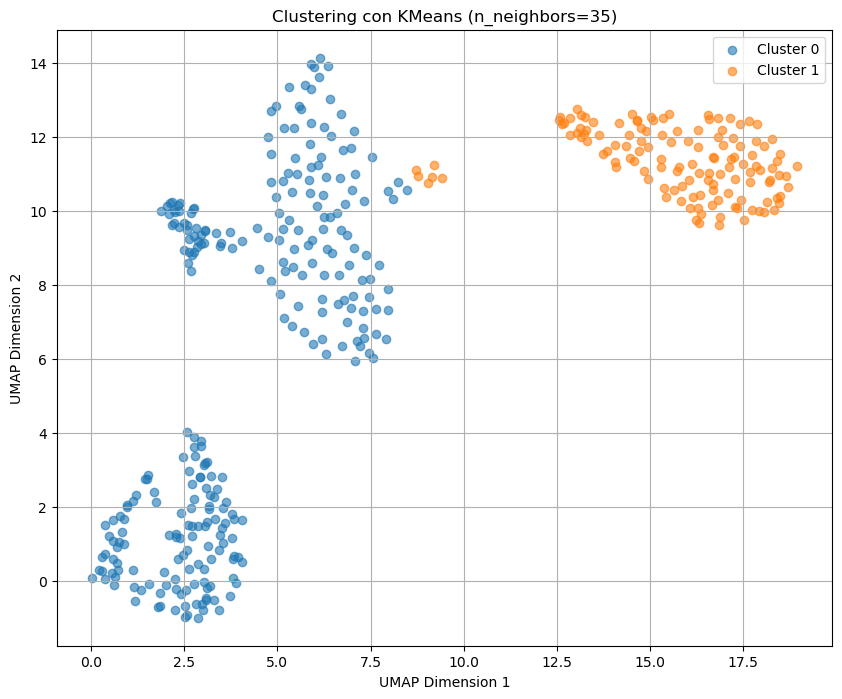


Miglior ARI: 0.03


In [519]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# VALORI ARS OTTIMO 40,60,41,100,150
# Inizializzazione
max_ari_r = -1
neighbours = [35]

# Lista con i nomi dei pazienti
patient_names = df_oc_vivi_con_ricorrenza.columns.tolist() + df_op_vivi_con_ricorrenza.columns.tolist() + df_hy_vivi_con_ricorrenza.columns.tolist() + df_la_vivi_con_ricorrenza.columns.tolist()

for n in neighbours:
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
    op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
    hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
    la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)
    
    # Concatenazione dei risultati UMAP
    combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels_r = kmeans.fit_predict(combined_embedding_r)
    print(labels_r)
    
    # Stampa delle etichette di clustering
    cluster_dict_r = {}
    for idx, label in enumerate(labels_r):
        if label not in cluster_dict_r:
            cluster_dict_r[label] = []
        cluster_dict_r[label].append(patient_names[idx])
        print(f"ID paziente: {idx}, Nome: {patient_names[idx]}, Cluster: {label}")
        
    print(f"\nClustering con n_neighbors={n}")
    for cluster_id, patients in cluster_dict_r.items():
        print(f"Cluster {cluster_id}: {patients}")
    
    # Calcolo delle metriche
    score_r = silhouette_score(combined_embedding_r, labels_r) if len(set(labels_r)) > 1 else None
    ari_r = adjusted_rand_score(combined_dataset_r['Status_Alive'], labels_r)
    
    if ari_r > max_ari_r:
        max_ari_r = ari_r
        print(f"\nNuovo miglior ARI: {ari_r:.2f}")
        print(f"Silhouette Score: {score_r:.2f}" if score_r is not None else "Silhouette Score non calcolabile.")
        print('Neighbours =', n)
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels_r)
    for label in unique_labels:
        mask = labels_r == label
        plt.scatter(
            combined_embedding_r[mask, 0],
            combined_embedding_r[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"\nMiglior ARI: {max_ari_r:.2f}")


In [617]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(n, clusters, df, col):
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')

    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
    op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
    hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
    la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)

    # Concatenazione dei risultati UMAP
    combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])

    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    labels_r = kmeans.fit_predict(combined_embedding_r)

    # Convertire le etichette in stringhe
    true_labels = df[col].astype(str)
    pred_labels = pd.Series(labels_r, index=true_labels.index, dtype=str)  # Assicurati che abbiano la stessa lunghezza

    # Etichette combinate
    all_labels = sorted(set(true_labels) | set(pred_labels))

    # Calcolo della matrice di confusione
    cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)

    # Visualizzazione della matrice di confusione
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=all_labels, yticklabels=all_labels)
    return cm


C:\Users\matti\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


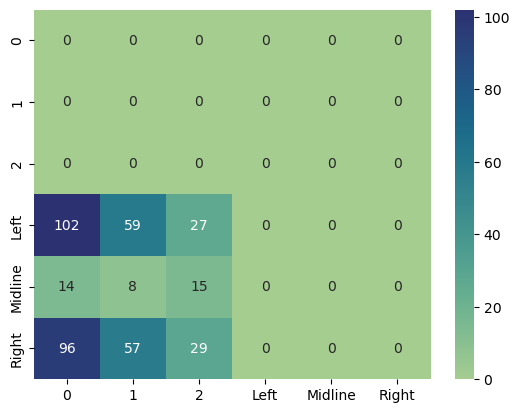

In [621]:
c = print_confusion_matrix(70, 3, combined_dataset_r, 'ctn_Laterality_of_T')

In [613]:
count = (combined_dataset_r['Status_Alive'] == 1).sum()
count

115

In [551]:
from sklearn.utils.multiclass import unique_labels
def plot(true_labels, pred_labels):
    lab = unique_labels(true_labels)
    column = [f'Predicted {l}' for l in lab]
    indices = [f'{l}' for l in lab]
    table = pd.Dataframe(confusion_matrix(true_labels, pred_labels), column=column, index = indices)
    return table

plot(combined_dataset_r['Status_Alive'].astype(int), labels_r)

AttributeError: module 'pandas' has no attribute 'Dataframe'